# PLS2 
## Some notes on Partial Least Squares as a method 

- Here, we use PLS2 to detect multivariate proteome–connectome associations
- We will test this on a subset of data where we have protein data for ~ 1,400 proteins (for around 4,000 participants) aka a matrix of [4644 rows × 1464 columns] and fractional anisotropy (FA) white matter data for 27 white matter tracts aka a matrix of [4644 rows × 27 columns]
- analytical challenge lies in uncovering the latent information embedded within our two datasets while handling the inherent multicollinearity between both predictors and outcome measures

In [60]:
 !pip install pandas

In [56]:
  import pandas as pd

In [57]:
 !pip install pyarrow

In [58]:
 !pip install numpy
 !pip install scikit-learn

In [59]:
# !pip install matplotlib

# 1. PLS2 for proteomics and DTI data initial test run

In [7]:
# Load relevant packages 
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

## 1.1 Load relevant data for pilot test

In [8]:
# Check what's in directory
# import os
# current_directory = os.getcwd()
# print(current_directory)

In [9]:
proteomics = "/Users/eleanorc_worklaptop/Desktop/UKB_Proteomics/UKB_PPP_python/ST3_UKB_proteins.csv"
df_p_data = pd.read_csv(proteomics)
df_p_data

,UKBPPP ProteinID,Olink ID,Assay Target,Protein panel,Gene symbol,UniProt,Gene CHROM,Gene start,Gene end,Dilution factor,% of samples below LOD,Coefficient of variation (median %)
0,AARSD1:Q9BTE6:OID21311:v1,OID21311,AARSD1,Oncology,AARSD1,Q9BTE6,17,42950526,42964498,1:1,0.05%,4.78
1,ABHD14B:Q96IU4:OID20921:v1,OID20921,ABHD14B,Neurology,ABHD14B,Q96IU4,3,51968510,51983409,1:1,0.04%,8.97
2,ABL1:P00519:OID21280:v1,OID21280,ABL1,Oncology,ABL1,P00519,9,130713016,130887675,1:1,0.04%,6.03
3,ACAA1:P09110:OID21269:v1,OID21269,ACAA1,Oncology,ACAA1,P09110,3,38103129,38137242,1:1,17.20%,12.97
4,ACAN:P16112:OID20159:v1,OID20159,ACAN,Cardiometabolic,ACAN,P16112,15,88803436,88875353,1:10,0.13%,6.18
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,XRCC4:Q13426:OID20869:v1,OID20869,XRCC4,Neurology,XRCC4,Q13426,5,83077498,83353787,1:1,80.94%,7.55
1468,YES1:P07947:OID21348:v1,OID21348,YES1,Oncology,YES1,P07947,18,721588,812546,1:1,0.04%,10.59
1469,YTHDF3:Q7Z739:OID20478:v1,OID20478,YTHDF3,Inflammation,YTHDF3,Q7Z739,8,63168553,63212786,1:1,10.88%,13.11
1470,ZBTB16:Q05516:OID21205:v1,OID21205,ZBTB16,Oncology,ZBTB16,Q05516,11,114059041,114256765,1:1,0.51%,8.49


In [10]:
# Load DTI data
neuroimaging_subset = "/Users/eleanorc_worklaptop/Desktop/UKB_Proteomics/UKB_PPP_python/merged_data.csv"
df_neuroimaging = pd.read_csv(neuroimaging_subset)
df_neuroimaging

,Unnamed: 0,eid,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,...,lML_FA,rML_FA,lPTR_FA,rPTR_FA,lSLF_FA,rSLF_FA,lSTR_FA,rSTR_FA,lUnc_FA,rUnc_FA
0,1,1000573,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,...,0.425137,0.438404,0.477601,0.466786,0.486486,0.435698,0.434628,0.437619,0.414991,0.403708
1,2,1000893,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,...,0.407959,0.397717,0.445529,0.457740,0.453780,0.433911,0.409192,0.423134,0.378078,0.373331
2,3,1001028,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,...,0.410745,0.450009,0.477916,0.441603,0.451860,0.430216,0.422117,0.421530,0.376068,0.365023
3,4,1003537,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,...,0.430355,0.439236,0.491488,0.471265,0.450530,0.446036,0.429410,0.430935,0.412622,0.406120
4,5,1004616,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,...,0.410290,0.408738,0.474783,0.450130,0.447044,0.431624,0.451923,0.441271,0.368224,0.360642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,4640,6018609,0.00650,0.45365,0.4506,1.42485,1.10560,0.6354,0.66945,0.28730,...,0.463914,0.468890,0.445366,0.452633,0.430563,0.407339,0.427389,0.405904,0.363829,0.351309
4640,4641,6019358,0.49865,0.02620,0.5769,0.61225,0.49330,0.5430,0.55165,1.00795,...,0.420189,0.414230,0.451537,0.454354,0.427003,0.419351,0.419468,0.429952,0.370552,0.380164
4641,4642,6021143,0.10620,2.29245,0.1899,0.03165,0.36700,1.0386,0.13275,1.36590,...,0.413580,0.398320,0.468904,0.474296,0.457283,0.457668,0.439893,0.454022,0.429197,0.464371
4642,4643,6021217,0.02515,0.15630,0.4839,0.79975,4.44390,0.0259,0.15815,0.19085,...,0.432379,0.425174,0.444384,0.479776,0.454680,0.449540,0.431674,0.433359,0.397299,0.383125


In [11]:
# Tidy this df
df_neuroimaging.drop(columns=['eid'], inplace=True)
df_neuroimaging.head()

,Unnamed: 0,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,GYS1,...,lML_FA,rML_FA,lPTR_FA,rPTR_FA,lSLF_FA,rSLF_FA,lSTR_FA,rSTR_FA,lUnc_FA,rUnc_FA
0,1,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,0.20335,...,0.425137,0.438404,0.477601,0.466786,0.486486,0.435698,0.434628,0.437619,0.414991,0.403708
1,2,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,0.86730,...,0.407959,0.397717,0.445529,0.457740,0.453780,0.433911,0.409192,0.423134,0.378078,0.373331
2,3,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,2.33680,...,0.410745,0.450009,0.477916,0.441603,0.451860,0.430216,0.422117,0.421530,0.376068,0.365023
3,4,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,0.97315,...,0.430355,0.439236,0.491488,0.471265,0.450530,0.446036,0.429410,0.430935,0.412622,0.406120
4,5,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,0.92150,...,0.410290,0.408738,0.474783,0.450130,0.447044,0.431624,0.451923,0.441271,0.368224,0.360642


In [12]:
# Assign white matter tracts and proteins from dataframes

wm_cols = ["FMaj_FA", "FMin_FA", "lAR_FA", "lATR_FA", "lCingG_FA", "lCingPH_FA",
           "lCST_FA", "lIFOF_FA", "lILF_FA", "lML_FA", "lPTR_FA", "lSLF_FA",
           "lSTR_FA", "lUnc_FA", "MCP_FA", "rAR_FA", "rATR_FA", "rCingG_FA",
           "rCingPH_FA", "rCST_FA", "rIFOF_FA", "rILF_FA", "rML_FA", "rPTR_FA",
           "rSLF_FA", "rSTR_FA", "rUnc_FA"]

wm = df_neuroimaging[wm_cols]

proteins = df_neuroimaging[[col for col in df_neuroimaging.columns if col not in wm_cols]]

proteins

,Unnamed: 0,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,GYS1,...,PRDX1,NAAA,NGF,MITD1,MMP1,OBP2B,PCOLCE,PAEP,NPM1,NMNAT1
0,1,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,0.20335,...,0.34580,1.0442,0.0900,0.67620,0.74310,0.49010,0.039624,1.86860,0.011198,0.0622
1,2,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,0.86730,...,1.22255,1.0864,0.0038,1.36675,0.44735,0.70345,0.039624,3.49205,0.515900,1.2389
2,3,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,2.33680,...,1.47190,0.3559,0.0624,1.56560,1.45220,1.18670,0.039624,0.00000,0.011198,0.1559
3,4,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,0.97315,...,0.02150,0.3292,0.0640,0.41860,1.32090,1.41025,0.039624,1.36310,0.011198,0.9298
4,5,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,0.92150,...,0.30125,0.4677,0.0376,0.72735,0.58605,0.85185,0.039624,0.16445,0.011198,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,4640,0.00650,0.45365,0.4506,1.42485,1.10560,0.6354,0.66945,0.28730,0.39795,...,0.52620,0.4138,0.3772,0.36270,0.36140,1.02420,0.306250,0.92680,0.011198,0.7953
4640,4641,0.49865,0.02620,0.5769,0.61225,0.49330,0.5430,0.55165,1.00795,0.50570,...,1.00565,0.5498,0.2122,0.59325,0.62125,0.05985,0.009800,1.64825,0.251700,0.1440
4641,4642,0.10620,2.29245,0.1899,0.03165,0.36700,1.0386,0.13275,1.36590,0.57045,...,0.52640,0.3326,0.0231,0.12760,1.95350,0.02335,0.039624,0.44200,0.011198,0.5101
4642,4643,0.02515,0.15630,0.4839,0.79975,4.44390,0.0259,0.15815,0.19085,0.15670,...,0.16195,0.1605,0.1358,0.75825,0.61365,0.03335,0.039624,1.31365,0.011198,0.1079


## Build a dictionary

In [13]:
# Create a dictionary called lookup based on information obtained from the proteins df and other predefined dictionaries and lists
lookup = {}

colors = {"Inflammation": "tab:red", "Neurology": "tab:blue", "Cardiometabolic": "tab:orange", "Oncology": "tab:green"}

for index in range(0,len(proteins.columns)):
    name = proteins.columns[index]
    panel = df_p_data[df_p_data['Assay Target'] == name]['Protein panel'].to_list()
    if index == 0:
        panel = ""
        color = "tab:grey"
    else:
        panel = panel[0]
        color = colors[panel]
    lookup[index] = {"name": name, "panel": panel, "color": color}

#lookup

In [14]:
def dictionary_head(dictionary, num_items=5):
    """
    Display the first 'num_items' key-value pairs from a dictionary.
    
    Args:
    dictionary (dict): The dictionary to display.
    num_items (int): Number of items to display (default is 5).
    """
    items_to_display = list(dictionary.items())[:num_items]
    for key, value in items_to_display:
        print(f"{key}: {value}")

# run function to glimpse() / skimr::skim()
dictionary_head(lookup)

0: {'name': 'Unnamed: 0', 'panel': '', 'color': 'tab:grey'}
1: {'name': 'GZMB', 'panel': 'Inflammation', 'color': 'tab:red'}
2: {'name': 'GRPEL1', 'panel': 'Oncology', 'color': 'tab:green'}
3: {'name': 'GSAP', 'panel': 'Oncology', 'color': 'tab:green'}
4: {'name': 'GSTA1', 'panel': 'Cardiometabolic', 'color': 'tab:orange'}


In [15]:
# Test our dictionary : 
lookup[1]

{'name': 'GZMB', 'panel': 'Inflammation', 'color': 'tab:red'}

In [16]:
# match up items
df2 = df_p_data[['Assay Target', 'Protein panel']]

df2[df2['Assay Target'] == 'THBS4']

,Assay Target,Protein panel
1352,THBS4,Cardiometabolic


## Run PLS2

In [17]:
# PLS2 attempt
pls2 = PLSRegression(n_components=2)

pls2.fit(proteins, wm)

PLSRegression()

In [18]:
[lookup[i]['color'] for i in range(0,len(pls2.x_loadings_))]

## Work out how many components to use

### See how much variance is explained by components 

In [19]:
# Work out how many components to use
# This takes a while to run
# I don't think this is what I need to do, I think I need to plot MSE

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cross_decomposition import PLSRegression
# 
# # Create and fit your PLS model (example)
# # n_components_max = 15  # Set the maximum number of components to explore
# n_components_max = 10  # Set the maximum number of components to explore
# X = proteins  # Sample data
# Y = wm   # Sample data
# 
# explained_variance = []  # Initialize a list to store explained variance for each component
# 
# for n_components in range(1, n_components_max + 1):
#     pls = PLSRegression(n_components=n_components)
#     pls.fit(X, Y)
#     
#     # Calculate the explained variance for the current number of components
#     explained_variance.append(np.var(pls.x_scores_, axis=0).sum() / np.var(X, axis=0).sum())
# 
# # Create a Scree Plot
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, n_components_max + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance / MSE')
# plt.title('Scree Plot')
# plt.grid(True)
# 
# # Show the Scree Plot
# plt.show()

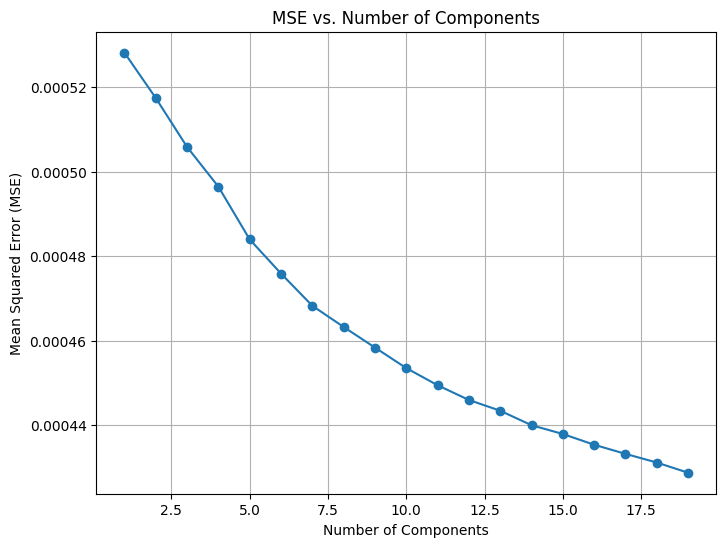

In [20]:
# PLotting MSE which is like R2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

# Create your X and Y data (here we're using proteomics as predictors and FA values as outcomes)
X = proteins  # Predictors 
Y = wm   # Outcome of interest 

# Define a range of components to explore
components_range = range(1, 20)  # Adjust the range as needed

# Initialize an empty list to store MSE values
mse_values = []

# Fit PLS2 models with different numbers of components and calculate MSE
for n_components in components_range:
    pls2 = PLSRegression(n_components=n_components)
    pls2.fit(X, Y)
    
    # Make predictions
    y_pred = pls2.predict(X)
    
    # Calculate MSE
    mse = mean_squared_error(Y, y_pred)
    
    # Append MSE to the list
    mse_values.append(mse)

# Plot MSE against the number of components
plt.figure(figsize=(8, 6))
plt.plot(components_range, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Components')
plt.grid(True)

# Show the plot
plt.show()

# What you need to do next:

*  Run PLS2 with X components (e.g. 15)
*  Take the X loadings matrix and take the absolute values across the proteins direction (dimension number 1) and also take the mean across this same dimension. This gives us a single combined loadings plot which gives you the average of all the loadings.

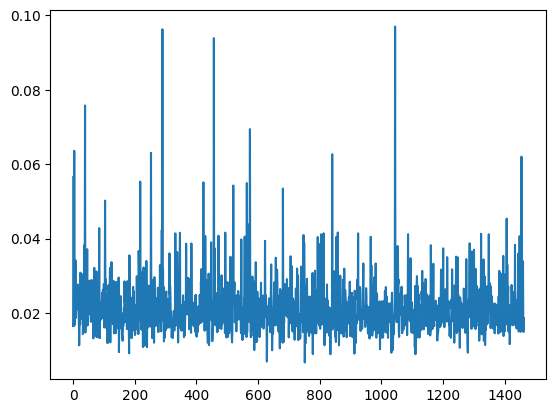

In [21]:
# This tells us for a 19 component model 
# Across all 19 components, this tells us the importance of specific proteins across 19 components 
# This is a plot of protein importance across all of the components 

plt.plot(np.mean(np.abs(pls2.x_loadings_), axis=1))

# Plot of relative importance of proteins in driving white matter (FA) integrity across 27 tracts

## Data reduction step

* This analysis justifies placing our attention on all of the white matter tracts and the following proteins

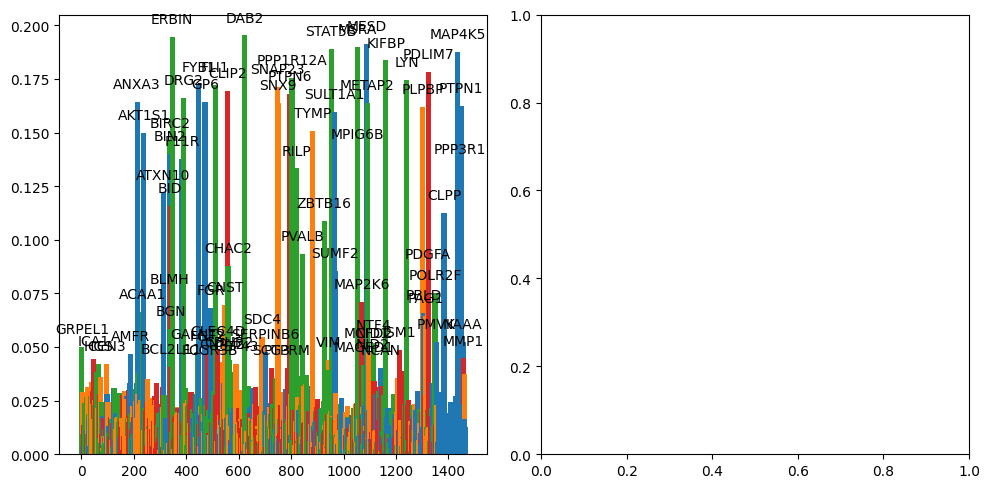

In [69]:
# Set your threshold value
threshold_value = 0.04  # Adjust this threshold as needed

mean_loading = np.mean(np.abs(pls2.x_loadings_), axis=1)

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a list of bar colors based on values from the 'lookup' dictionary
bar_colors = [lookup[i]['color'] for i in range(len(pls2.x_loadings_))]

# Plot the first set of loadings
ax1.bar(range(len(pls2.x_loadings_)), mean_loading, width=20, color=bar_colors)
ax1.set_title('')

# Label the bars with protein names for those bars where the loading is greater than the threshold
for i, loading_value in enumerate(mean_loading):
    if abs(loading_value) > threshold_value:
        ax1.annotate(proteins.columns[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')

for i, loading_value in enumerate(mean_loading):
    if abs(loading_value) > threshold_value:
        ax2.annotate(proteins.columns[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')


# Adjust plot layout
plt.tight_layout()

# Show the plots
plt.show()

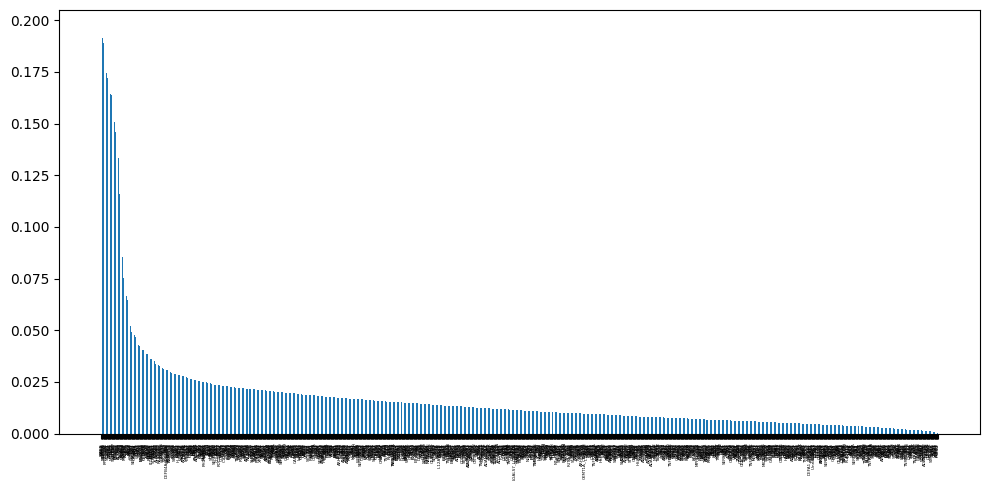

In [66]:
# Label plot for protein data to examine top contributors to latent
# Order by effect size

# Set your threshold value
threshold_value = 0.04  # Adjust this threshold as needed

mean_loading = np.mean(np.abs(pls2.x_loadings_), axis=1)
protein_names = proteins.columns.tolist()  # Get a list of WM names

# Sort mean_loading and white_matter_names based on mean_loading values
sorted_indices = np.argsort(mean_loading)[::-1]  # Sort in descending order
sorted_mean_loading = mean_loading[sorted_indices]
sorted_protein_names = [protein_names[i] for i in sorted_indices]

# Create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a list of bar colors based on values from the 'lookup' dictionary
bar_colors = [lookup[i]['color'] for i in range(len(pls2.x_loadings_))]

# Plot the loadings in the sorted order
ax.bar(range(len(sorted_mean_loading)), sorted_mean_loading, width=0.5)
ax.set_title('')

# Adjust the x-axis ticks and labels to show sorted protein names
ax.set_xticks(range(len(sorted_mean_loading)))
ax.set_xticklabels(sorted_protein_names, rotation=90, size = 3)

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()

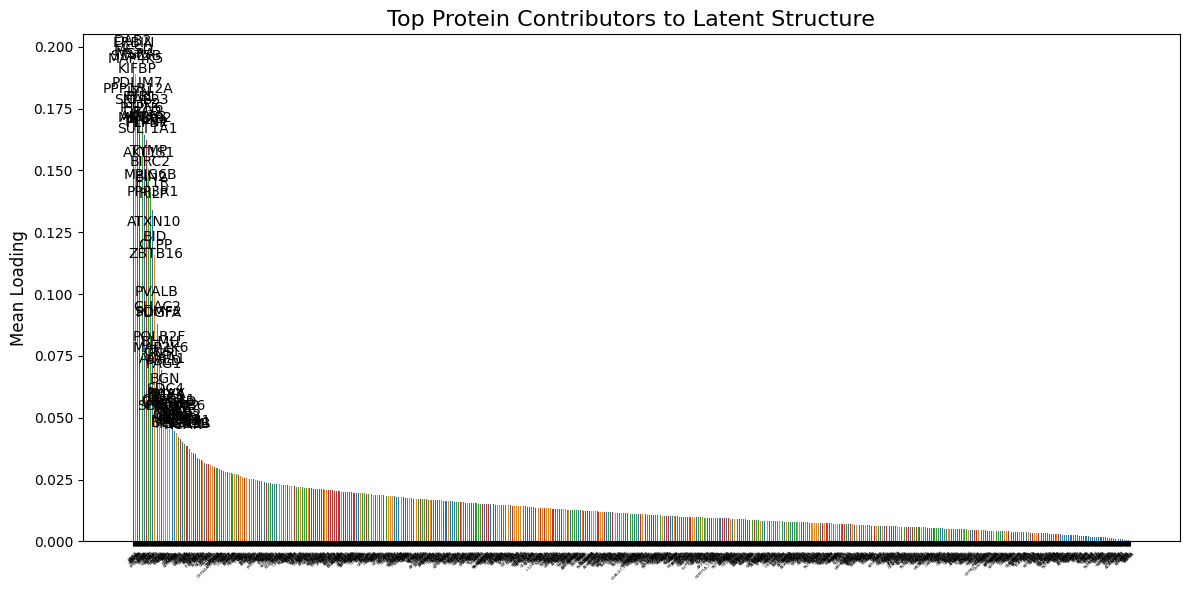

In [54]:
# Title for the plot
plot_title = "Top Protein Contributors to Latent Structure"

# Label plot for protein data to examine top contributors to latent
# Order by effect size

# Set your threshold value
threshold_value = 0.04  # Adjust this threshold as needed

mean_loading = np.mean(np.abs(pls2.x_loadings_), axis=1)
protein_names = proteins.columns.tolist()  # Get a list of protein names

# Sort mean_loading and protein_names based on mean_loading values
sorted_indices = np.argsort(mean_loading)[::-1]  # Sort in descending order
sorted_mean_loading = mean_loading[sorted_indices]
sorted_protein_names = [protein_names[i] for i in sorted_indices]

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a list of bar colors based on values from the 'lookup' dictionary
bar_colors = [lookup[i]['color'] for i in range(len(pls2.x_loadings_))]

# Plot the loadings in the sorted order
ax.bar(range(len(sorted_mean_loading)), sorted_mean_loading, width=0.5, color=bar_colors)

# Set plot title
plt.title(plot_title, fontsize=16)

# Label the bars with protein names for those bars where the loading is greater than the threshold
for i, loading_value in enumerate(sorted_mean_loading):
    if abs(loading_value) > threshold_value:
        ax.annotate(sorted_protein_names[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10)

# Adjust the x-axis ticks and labels to show sorted protein names
ax.set_xticks(range(len(sorted_mean_loading)))
ax.set_xticklabels(sorted_protein_names, rotation=90, fontsize=3)

# Set y-axis label
plt.ylabel('Mean Loading', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()

# Future work:
## 1). Repeat this analysis with just the above proteins that have been idenitified as important 

* If the screeplot for just ~ 30 relevant proteins (MSE) is similiar, then most of the other proteins are redundant for explaining this relationship.
* It would be a strong case for certain proteins /pathways being more important for white matter health
* Here, you could train a NN to do this prediction (pls.fit) and again compare the MSE and the prediction
* I.e. compare a non-linear model to this linear model to see why, if NN performs better this strongly suggests non-linear methods better

# Some notes:
## When controlling for BMI, etc.

* concatenate relevant covariates in with predictors (aka proteins) - important scaling to consider
* Extract MSE from this
* Do this across different test-train samples
* End up with two MSE values, compare them as you would two R2 values in linear regression

## Further notes: When controlling for BMI, etc.
* Put covariates in but do not show in plot
* Theoretically, one of the components could explain the variance in the direction of BMI etc.
* Strictly, you can actually remove the influence statistically from the dataset:
* but I think this could be confusing to explain
* could control for it by modelling all of the variance relating to BMI etc.

# No specific white matter tract dominates this relationship
## This justifies use of gFA I think

* the following plot justifies collapsing the FA data into a single aggregate score

<BarContainer object of 27 artists>

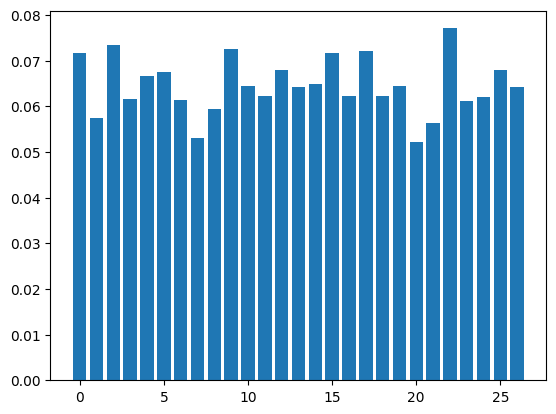

In [24]:
plt.bar(range(0, 27), np.mean(np.abs(pls2.y_loadings_), axis=1))

## Label plot for DTI data to examine top contributors to latent

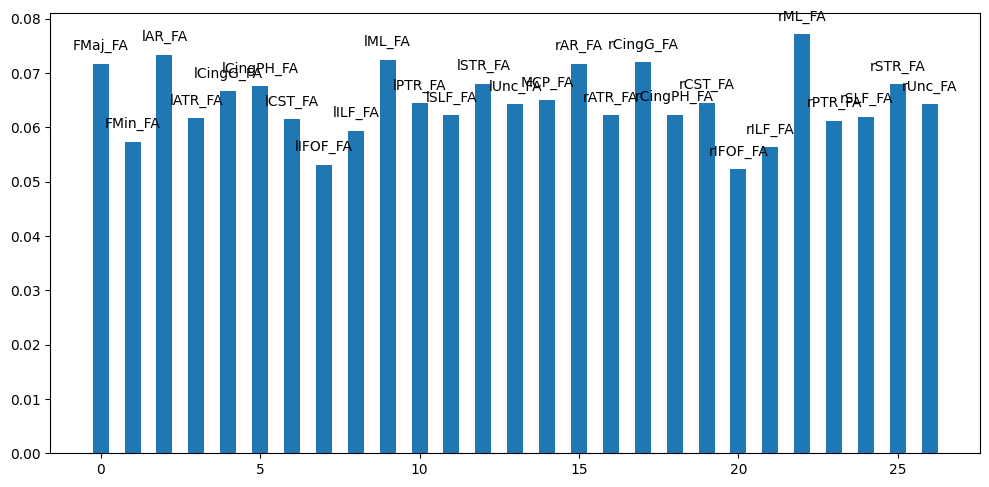

In [25]:
# Label plot for DTI data to examine top contributors to latent
# Set your threshold value
threshold_value = 0.04  # Adjust this threshold as needed

mean_loading = np.mean(np.abs(pls2.y_loadings_), axis=1)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a list of bar colors based on values from the 'lookup' dictionary
# bar_colors = [lookup[i]['color'] for i in range(len(pls2.y_loadings_))]

# Plot the loadings
ax.bar(range(0, 27), mean_loading, width=0.5)
ax.set_title('')

# Label the bars with protein names for those bars where the loading is greater than the threshold
for i, loading_value in enumerate(mean_loading):
    if abs(loading_value) > threshold_value:
        ax.annotate(wm.columns[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()

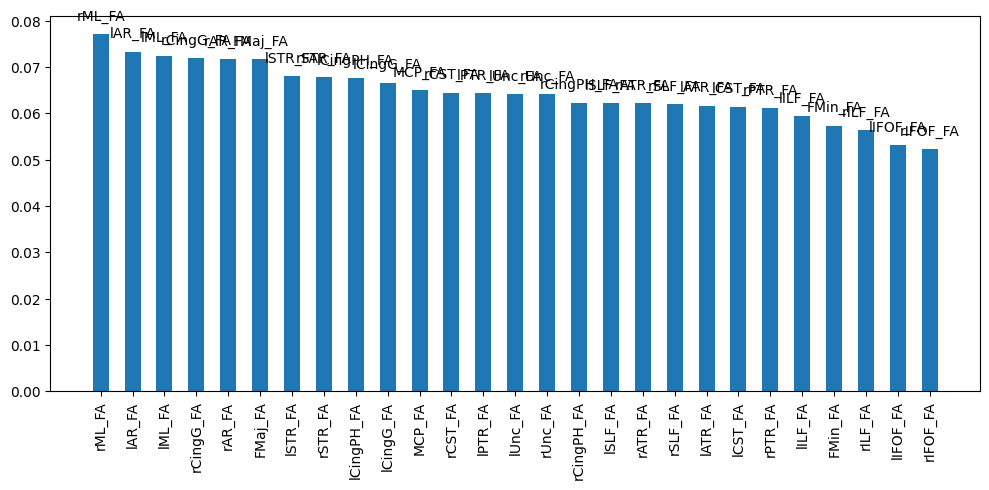

In [26]:
# Label plot for DTI data to examine top contributors to latent
# Order by effect size

# Set your threshold value
threshold_value = 0.04  # Adjust this threshold as needed

mean_loading = np.mean(np.abs(pls2.y_loadings_), axis=1)
white_matter_names = wm.columns.tolist()  # Get a list of WM names

# Sort mean_loading and white_matter_names based on mean_loading values
sorted_indices = np.argsort(mean_loading)[::-1]  # Sort in descending order
sorted_mean_loading = mean_loading[sorted_indices]
sorted_white_matter_names = [white_matter_names[i] for i in sorted_indices]

# Create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a list of bar colors based on values from the 'lookup' dictionary
# bar_colors = [lookup[i]['color'] for i in range(len(pls2.y_loadings_))]

# Plot the loadings in the sorted order
ax.bar(range(len(sorted_mean_loading)), sorted_mean_loading, width=0.5)
ax.set_title('')

# Label the bars with protein names for those bars where the loading is greater than the threshold
for i, loading_value in enumerate(sorted_mean_loading):
    if abs(loading_value) > threshold_value:
        ax.annotate(sorted_white_matter_names[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust the x-axis ticks and labels to show sorted protein names
ax.set_xticks(range(len(sorted_mean_loading)))
ax.set_xticklabels(sorted_white_matter_names, rotation=90)

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


# Split the data into testing and training

* Split this dataset into a training sample (75% of dataset)
* and into a test set (25% of dataset)

Do this to prevent overfitting (arbritarily adding components that explain incremental variance that may be as a result of overfitting to our dataset)

# Plot PLS2 loadings
The code below will create two side-by-side bar plots (ax1 and ax2) to visualize the loadings of the X variables for the first and second components. Each bar in the plot represents the loading value of a specific X variable, and the bars are colored based on a color scheme specified in the bar_colors list that relates to which protein panel the proteomic data is from. 

The color is determined by looking up the corresponding value in the lookup dictionary, which likely contains information about the X variables (aka their respective panels) and the associated colors assigned to these:

colors = {"Inflammation": "tab:red", "Neurology": "tab:blue", "Cardiometabolic": "tab:orange", "Oncology": "tab:green"}

<BarContainer object of 1464 artists>

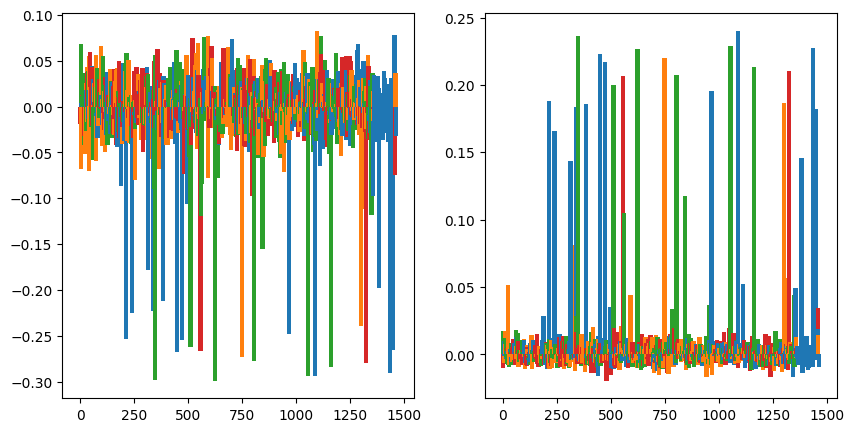

In [27]:
# Plot these loadings
# loadings of the X variables in the PLS2 model. 
# Loadings represent the contribution of each variable to the latent factors (components) extracted by PLS2. 
# focusing on the first two loadings ([:, 0] and [:, 1]), which are associated with the first and second components.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

bar_colors =[lookup[i]['color'] for i in range(0,len(pls2.x_loadings_))]

ax1.bar(range(0, len(pls2.x_loadings_)), pls2.x_loadings_[:,0], width=20, color=bar_colors)
ax2.bar(range(0, len(pls2.x_loadings_)), pls2.x_loadings_[:,1], width=20, color=bar_colors)

## Label plots: identify proteins with significant contributions

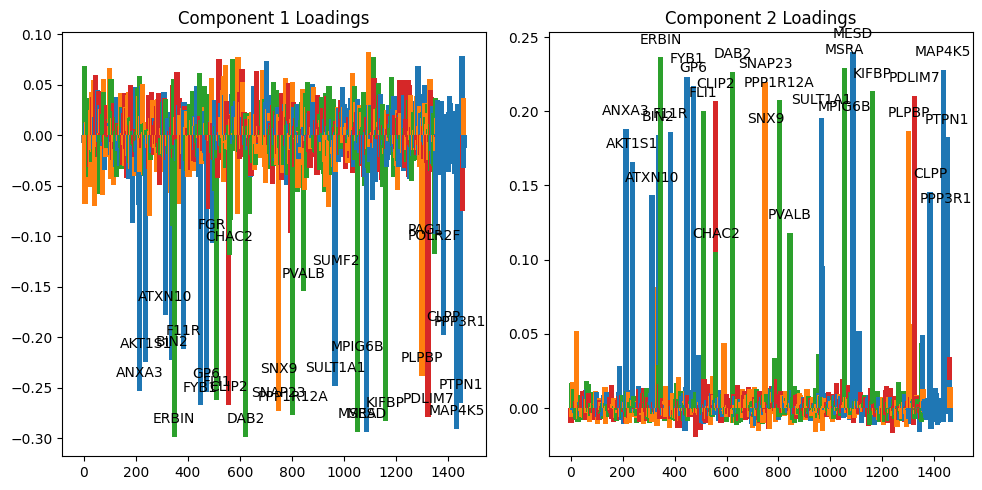

In [28]:
# Test code
import matplotlib.pyplot as plt

# Set your threshold value
threshold_value = 0.10  # Adjust this threshold as needed

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a list of bar colors based on values from the 'lookup' dictionary
bar_colors = [lookup[i]['color'] for i in range(len(pls2.x_loadings_))]

# Plot the first set of loadings
ax1.bar(range(len(pls2.x_loadings_)), pls2.x_loadings_[:, 0], width=20, color=bar_colors)
ax1.set_title('Component 1 Loadings')

# Plot the second set of loadings
ax2.bar(range(len(pls2.x_loadings_)), pls2.x_loadings_[:, 1], width=20, color=bar_colors)
ax2.set_title('Component 2 Loadings')

# Label the bars with protein names for those bars where the loading is greater than the threshold
for i, loading_value in enumerate(pls2.x_loadings_[:, 0]):
    if abs(loading_value) > threshold_value:
        ax1.annotate(proteins.columns[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')

for i, loading_value in enumerate(pls2.x_loadings_[:, 1]):
    if abs(loading_value) > threshold_value:
        ax2.annotate(proteins.columns[i], (i, loading_value), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust plot layout
plt.tight_layout()

# Show the plots
plt.show()


<BarContainer object of 27 artists>

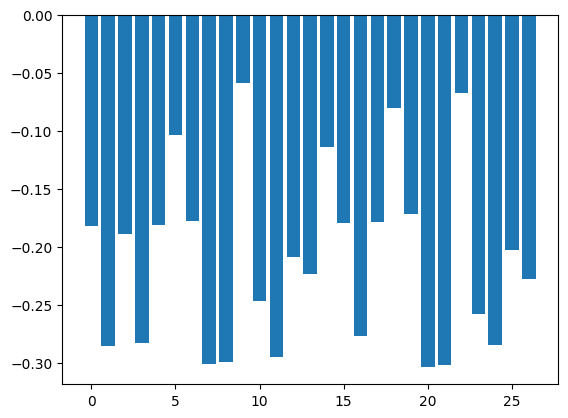

In [29]:
import matplotlib.pyplot as plt

plt.bar(range(0, 27), pls2.y_loadings_[:, 0])

## Scatter plot of Latent Variables (LVs)

The scatter plot allows you to visualize the relationships between LVs derived from protein data and LVs derived from DTI data. Each point on the scatter plot represents a sample (or subject), and its position is determined by the values of the LVs for both datasets.

PLS2 (Partial Least Squares Type 2) is a technique for integrating information from two or more datasets to identify associations or relationships between them. The scatter plot shows how well the LVs from the protein data align or correlate with the LVs from the DTI data. If there are clear patterns or clusters, it indicates a potential relationship between protein expression and DTI metrics.

In [30]:
lv_scores = pls2.x_scores_

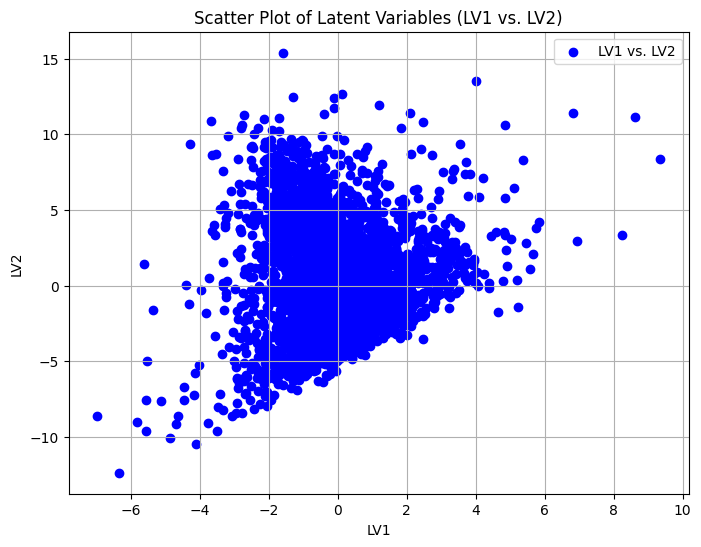

In [31]:
import matplotlib.pyplot as plt

# Assuming 'lv_scores' contains the LV scores from your PLS2 model
# 'lv_scores' should be a two-dimensional array with LV scores in columns

# Extract the first and second LVs (columns 0 and 1)
lv1 = lv_scores[:, 0]
lv2 = lv_scores[:, 1]

# Create a scatter plot of LV1 vs. LV2
plt.figure(figsize=(8, 6))
plt.scatter(lv1, lv2, c='b', marker='o', label='LV1 vs. LV2')

# Add labels and title
plt.xlabel('LV1')
plt.ylabel('LV2')
plt.title('Scatter Plot of Latent Variables (LV1 vs. LV2)')

# Add legend if needed
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Loadings plot

In [32]:
# Following code not validated 

In [33]:
proteins.columns[i]

'NMNAT1'

# Residuals plot

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cross_decomposition import PLSRegression
# 
# # Create and fit your PLS2 regression model (example)
# # pls2 = PLSRegression(n_components=1)
# # X = np.random.rand(50, 10)  # Sample data
# # Y = np.random.rand(50, 1)   # Sample data
# # pls2.fit(X, Y)
# 
# pls2 = PLSRegression(n_components=2)
# pls2.fit(proteins, wm)
# 
# # Calculate residuals
# y_predicted = pls2.predict(proteins)
# residuals = wm - y_predicted
# 
# # Create a residuals plot
# plt.figure(figsize=(8, 6))
# plt.scatter(y_predicted, residuals, c='b', marker='o', label='Residuals')
# 
# # Add labels and title
# plt.xlabel('Predicted Y')
# plt.ylabel('Residuals')
# plt.title('Residuals Plot')
# 
# # Add a horizontal line at y=0 for reference
# plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
# 
# # Show the plot
# plt.legend()
# plt.grid(True)
# plt.show()


In [35]:
# Calculate explained variance for each LV
# explained_variance = np.var(pls2.x_scores_, axis=0) / np.var(X, axis=0).sum()

# Applying PCA prior to PLS?

In [36]:
proteins.head()

,Unnamed: 0,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,GYS1,...,PRDX1,NAAA,NGF,MITD1,MMP1,OBP2B,PCOLCE,PAEP,NPM1,NMNAT1
0,1,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,0.20335,...,0.34580,1.0442,0.0900,0.67620,0.74310,0.49010,0.039624,1.86860,0.011198,0.0622
1,2,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,0.86730,...,1.22255,1.0864,0.0038,1.36675,0.44735,0.70345,0.039624,3.49205,0.515900,1.2389
2,3,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,2.33680,...,1.47190,0.3559,0.0624,1.56560,1.45220,1.18670,0.039624,0.00000,0.011198,0.1559
3,4,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,0.97315,...,0.02150,0.3292,0.0640,0.41860,1.32090,1.41025,0.039624,1.36310,0.011198,0.9298
4,5,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,0.92150,...,0.30125,0.4677,0.0376,0.72735,0.58605,0.85185,0.039624,0.16445,0.011198,0.9957


In [37]:
proteins_dropped = proteins.drop('Unnamed: 0', axis=1) 

In [38]:
proteins_dropped.head()

,GZMB,GRPEL1,GSAP,GSTA1,GSTA3,GSTP1,GUCA2A,GUSB,GYS1,GZMA,...,PRDX1,NAAA,NGF,MITD1,MMP1,OBP2B,PCOLCE,PAEP,NPM1,NMNAT1
0,0.18050,0.44505,0.3517,0.87555,0.59995,0.4293,0.13085,0.90860,0.20335,0.01080,...,0.34580,1.0442,0.0900,0.67620,0.74310,0.49010,0.039624,1.86860,0.011198,0.0622
1,0.88645,0.69160,0.6700,1.24515,0.67090,0.8054,0.22295,0.17655,0.86730,0.35215,...,1.22255,1.0864,0.0038,1.36675,0.44735,0.70345,0.039624,3.49205,0.515900,1.2389
2,1.37140,0.78770,2.0522,0.46210,0.73440,0.3075,0.71600,0.40510,2.33680,0.71350,...,1.47190,0.3559,0.0624,1.56560,1.45220,1.18670,0.039624,0.00000,0.011198,0.1559
3,0.57010,0.43875,0.3803,0.43135,0.28970,0.4099,0.00475,0.62660,0.97315,0.08645,...,0.02150,0.3292,0.0640,0.41860,1.32090,1.41025,0.039624,1.36310,0.011198,0.9298
4,1.19495,0.83780,0.2743,0.56105,0.31370,1.5987,0.33875,0.13995,0.92150,0.26765,...,0.30125,0.4677,0.0376,0.72735,0.58605,0.85185,0.039624,0.16445,0.011198,0.9957


# Running a PCA as a first step
## Still to do, following code does not work

In [55]:
#import matplotlib.pyplot as plt
#import numpy as np
#
#from sklearn.decomposition import PCA
#
#X = proteins_dropped 
#
#pca = PCA(n_components=2).fit(X)
#
##Scatter plot the results
#plt.scatter(pca.components_[0], pca.components_[1], alpha=0.3, label="samples")
#for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
#    comp = comp * var  # scale component by its variance explanation power
#    plt.arrow(0, 0, comp[0], comp[1], width=0.01, head_width=0.1, head_length=0.1, fc='r', ec='r', label=f"PC {i+1}")
#
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.legend()
#plt.show()

# 2. Divide into test and train datasets

## Training and test split

This code uses train_test_split from sklearn.model_selection to partition both the predictors ('proteins') and the outcomes ('wm') into training and testing sets. The test_size=0.2 argument specifies that 20% of the data will be reserved for testing (common choice for datasets this size). The random_state=42 ensures that the split is reproducible, meaning I'll get the same split every time I run this code, facilitating consistent training and evaluation of my models.

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'proteins' is your predictors dataframe with shape (4644, 1464)
# and 'wm' is your outcome dataframe with shape (4644, 27)

# Fix the random seed
np.random.seed(42)

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(proteins, wm, test_size=0.2, random_state=42)

# X_train, Y_train will be your training sets
# X_test, Y_test will be your testing sets

# Check the shape of the resulting arrays to confirm the split
print("Training set for predictors (X_train):", X_train.shape)
print("Testing set for predictors (X_test):", X_test.shape)
print("Training set for outcomes (Y_train):", Y_train.shape)
print("Testing set for outcomes (Y_test):", Y_test.shape)

Training set for predictors (X_train): (3715, 1464)
Testing set for predictors (X_test): (929, 1464)
Training set for outcomes (Y_train): (3715, 27)
Testing set for outcomes (Y_test): (929, 27)


In [41]:
def plot_scores(X_train_r, Y_train_r,
                X_test_r, Y_test_r):

    # 1) On diagonal plot X vs Y scores on each components
    plt.figure(figsize=(12, 8))
    plt.subplot(221)
    plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
                marker="o", c="b", s=25)
    plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
                marker="o", c="r", s=25)
    plt.xlabel("X comp. 1")
    plt.ylabel("Y comp. 1")
    plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
              np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
    plt.xticks(())
    plt.yticks(())
    plt.legend(loc="best")

    plt.subplot(224)
    plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
                marker="o", c="b", s=25)
    plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
                marker="o", c="r", s=25)
    plt.xlabel("X comp. 2")
    plt.ylabel("Y comp. 2")
    plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
              np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
    plt.xticks(())
    plt.yticks(())
    plt.legend(loc="best")

    # 2) Off diagonal plot components 1 vs 2 for X and Y
    plt.subplot(222)
    plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
                marker="*", c="b", s=50)
    plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
                marker="*", c="r", s=50)
    plt.xlabel("X comp. 1")
    plt.ylabel("X comp. 2")
    plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
              % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
    plt.legend(loc="best")
    plt.xticks(())
    plt.yticks(())

    plt.subplot(223)
    plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
                marker="*", c="b", s=50)
    plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
                marker="*", c="r", s=50)
    plt.xlabel("Y comp. 1")
    plt.ylabel("Y comp. 2")
    plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
              % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
    plt.legend(loc="best")
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [42]:
# CCA (PLS mode B with symmetric deflation)
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
import matplotlib.pyplot as plt
import numpy as np

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

# CCA

## Plot

The matrices obtained contain the scores of the latent variables for each sample. We can now plot the results thanks to the plot function defined earlier.

If the method has been successfully applied, the graphs comparing X vs. Y should be hightly correlated (i.e. corr close to 1) while in the other graphs, the data should show no correlation (i.e. corr close to 0, because the 2 components are orthogonal).


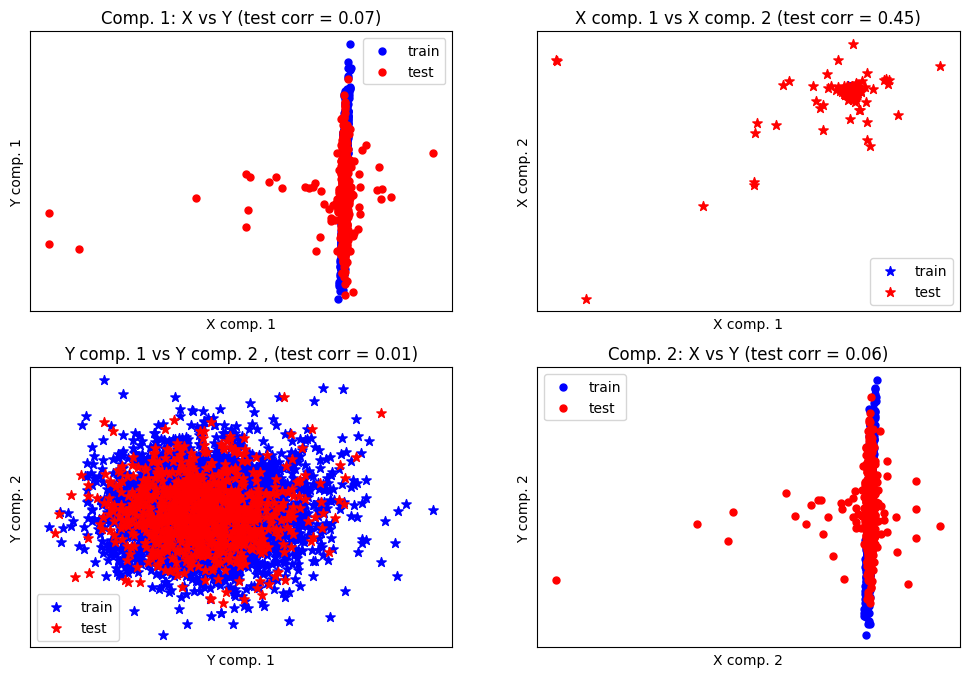

In [43]:
plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

# Partial Least Square (PLS) Canonical
Often also refered to in the literature as PLS Correlation (PLSC). Part of the partial least squares family, this method maximises covariance over correlation but maintains the symmetry offered by CCA (i.e gives no preference to X or Y) between blocks of variables (unlike the other PLS methods). Similar to CCA, this method is suitable for high-dimensional collinear data however it may out perform CCA as the number of variables increase relative to the number of sujects.

For a comparison of PLSC and CCA (specific to genetic and imaging data) see: Grellmann, C., S. Bitzer, J. Neumann, L. T. Westlye, O. A. Andreassen, A. Villringer and A. Horstmann (2015). "Comparison of variants of canonical correlation analysis and partial least squares for combined analysis of MRI and genetic data." NeuroImage

For a comparision of PLSC and PLS Regression see: Krishnan, A., L. J. Williams, A. R. McIntosh and H. Abdi (2011). "Partial Least Squares (PLS) methods for neuroimaging: A tutorial and review." NeuroImage

N.B. CCA was developed prior and independently to PLS; CCA is a special case of PLS, and corresponds to PLS in "Mode B" in the literature (from sklearn documentation)

# Canonical (symmetric) PLS (cPLS)

In [44]:
# Canonical (symmetric) PLS

plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

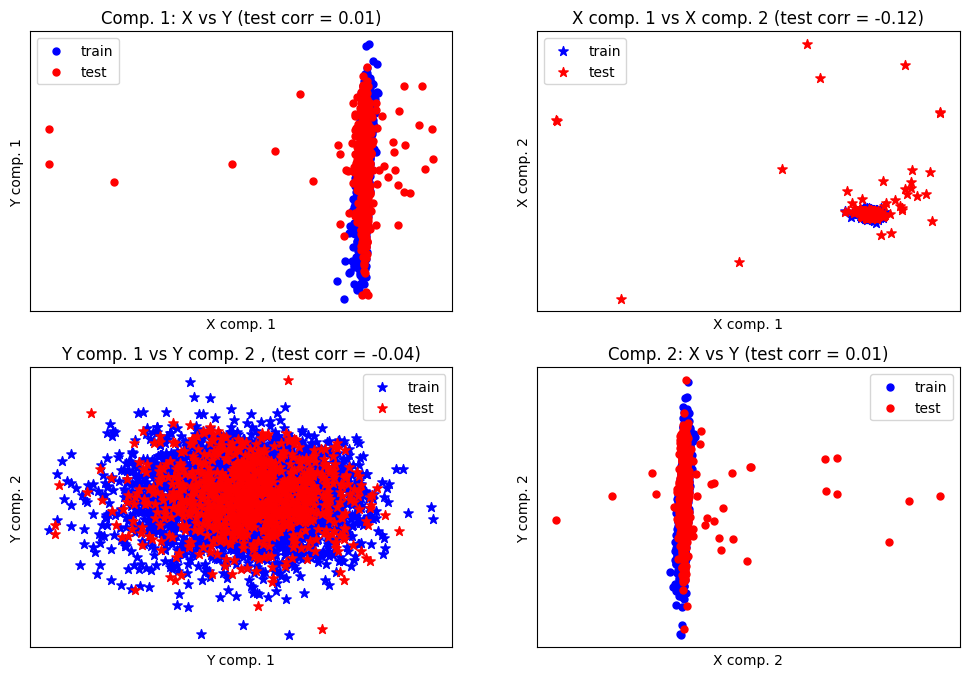

In [45]:
plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

Note that in this scenario, CCA and PLSCanonical seems to give the same results (not effective)

# PLS2

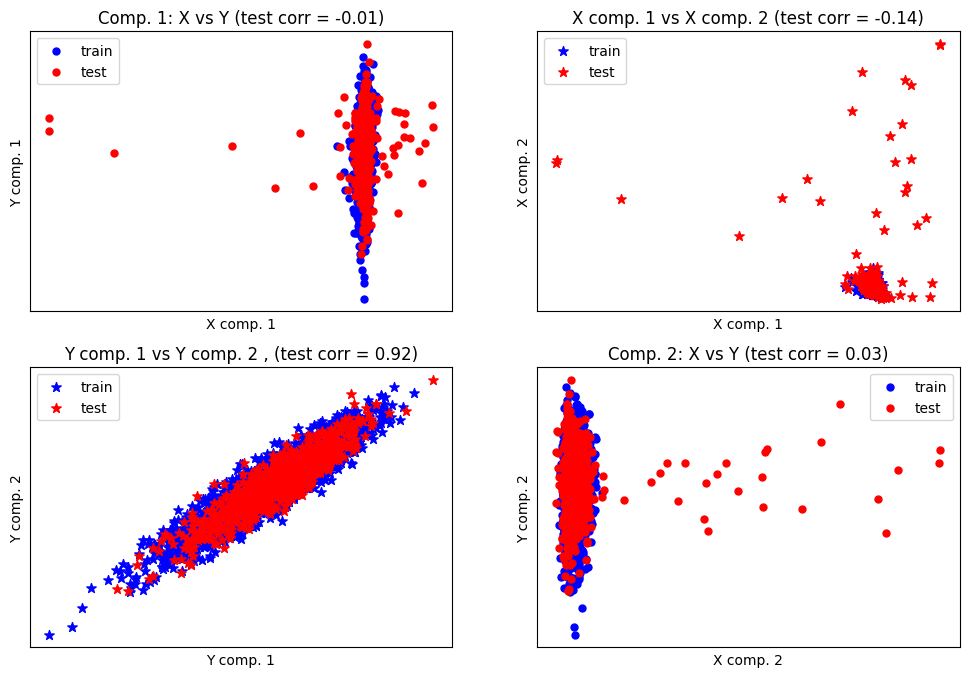

In [46]:
# PLS regression, with multivariate response, a.k.a. PLS2

pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, Y_train)

X_train_r, Y_train_r = pls2.transform(X_train, Y_train)
X_test_r, Y_test_r = pls2.transform(X_test, Y_test)

plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

# PLS2 more appropriate than CCA?

PLS regression is more a supervised approach and is usually used to predict Y based on X. We can thus compute the correlation score (R squared) between the true Y and the predicted Y.

In [47]:
from sklearn.metrics import r2_score

Y_pred = pls2.predict(X_test)
r2_score(Y_test, Y_pred, multioutput='raw_values')

array([ -4.79578712, -10.56224096,  -5.43585103, -10.15442591,
        -3.60544124,  -1.22894345,  -4.25904375, -12.39087996,
       -11.76583675,  -0.80019175,  -8.74388874, -11.76796612,
        -5.39170625,  -6.87527345,  -2.09737121,  -4.41703562,
        -9.56319917,  -3.25940281,  -1.15275649,  -3.88092227,
       -12.90800457, -12.42447968,  -0.85633377,  -9.77255002,
       -11.04118355,  -5.63871572,  -6.54403703])

As expected, the higher scores obtained correpond to the one having latent variables in common within X.

Now what happen if we use PLS Canonical instead of PLS Regression?

# PLS Canonical

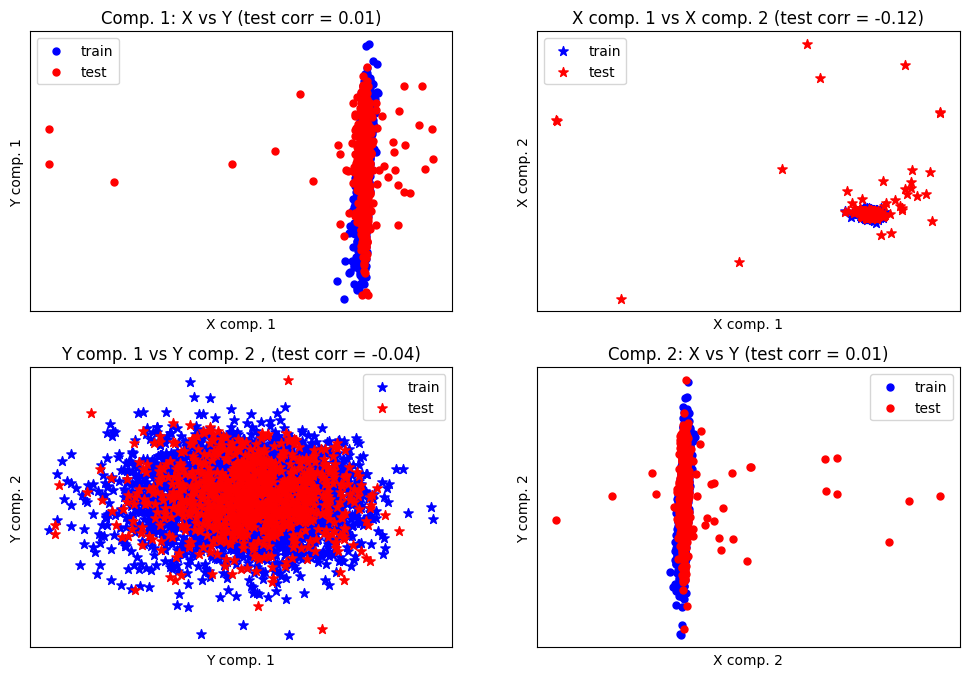

In [48]:
# PLS Canonical

plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
Y_pred = plsca.predict(X_test)

X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

In [49]:
r2_score(Y_test, Y_pred, multioutput='raw_values')

array([ -4.62042576,  -5.09090013,  -4.10319794,  -4.30828275,
        -1.55780357,  -2.5040618 , -20.54987721,  -8.2959058 ,
        -8.19369387, -12.37827966,  -9.06556224,  -5.03458994,
       -17.5771611 ,  -3.09587076,  -4.14201693,  -5.70330199,
        -4.25402961,  -1.55106769,  -3.99088028, -21.31726384,
        -7.24989609,  -6.91117718, -15.99274859,  -6.14687712,
        -5.00373455, -18.62361342,  -3.0983268 ])

We observe that the same latent variables has been computed but the R2 scores are much worst with PLS Canonical.